## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [3]:
df_train = pd.read_csv("Titanic_train.csv")
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


## 觀察 Age

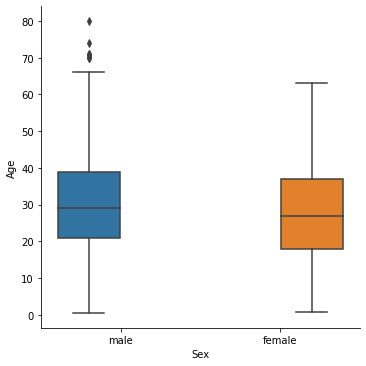

In [5]:
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train,kind="box")

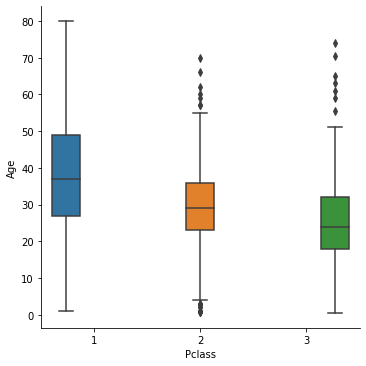

In [6]:
g = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=df_train,kind="box")

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train['Pclass']=le.fit_transform(df_train['Pclass'])
data=df_train[['Sex','Age','Pclass']]
data

,Sex,Age,Pclass
0,1,22.0,2
1,0,38.0,0
2,0,26.0,2
3,0,35.0,0
4,1,35.0,2
...,...,...,...
886,1,27.0,1
887,0,19.0,0
888,0,NaN,2
889,1,26.0,0


In [12]:
value_neighbors=3
missing_index=data.isnull()
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))
display(data[missing_index.values==True])
display(df_filled[missing_index.values==True])

,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
...,...,...,...
859,1,NaN,2
863,0,NaN,2
868,1,NaN,2
878,1,NaN,2


,0,1,2
5,1.0,19.666667,2.0
17,1.0,45.000000,1.0
19,0.0,19.000000,2.0
26,1.0,19.666667,2.0
28,0.0,19.000000,2.0
...,...,...,...
859,1.0,19.666667,2.0
863,0.0,19.000000,2.0
868,1.0,19.666667,2.0
878,1.0,19.666667,2.0
